# conda install -c conda-forge tensorflow - https://anaconda.org/conda-forge/tensorflow
# conda install -c conda-forge keras - https://anaconda.org/conda-forge/keras

In [1]:
import tensorflow as tf
#import keras

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
from tensorflow.keras.layers import Dense # Dense layers are "fully connected" layers
from tensorflow.keras.models import Sequential# Documentation: https://keras.io/models/sequential/
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


In [6]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape,y_test

((10000, 28, 28), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [7]:
x_test[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [8]:
import matplotlib.pyplot as plt

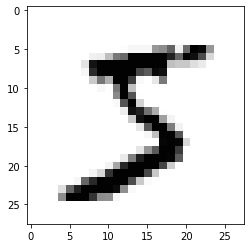

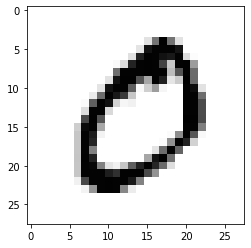

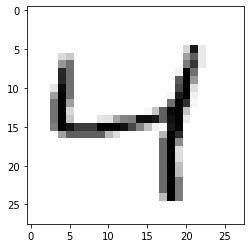

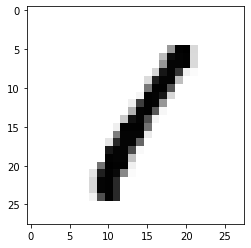

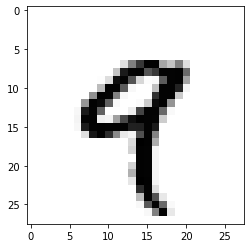

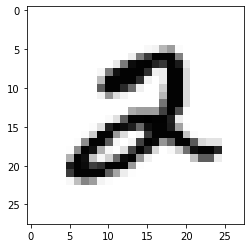

In [9]:
for i in range(6):
    img = x_train[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [11]:
28*28

784

# Prepare the dataset

In [12]:
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [13]:
x_train.shape

(60000, 784)

In [14]:
num_classes = 10

# Encode the Labels as One - Hot - Encoding Tensor or Vector

In [15]:
y_train_encode = to_categorical(y_train, num_classes)
y_test_encode = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train_encode[:10])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [16]:
y_train_encode.shape

(60000, 10)

In [17]:
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [20]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [21]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train_encode, batch_size=32, epochs=5, verbose=False, validation_split=.1)

In [24]:
model.predict(x_test)

array([[4.9484510e-04, 3.8566977e-05, 1.2712504e-03, ..., 9.8372340e-01,
        8.1468017e-05, 1.2462688e-02],
       [7.9867225e-03, 4.5576598e-03, 8.3470565e-01, ..., 4.4241533e-04,
        1.2792644e-02, 1.4001181e-04],
       [1.4086209e-05, 9.8252535e-01, 3.9390693e-03, ..., 5.4044381e-04,
        4.6028979e-03, 8.1087294e-04],
       ...,
       [1.7930673e-05, 2.6829570e-04, 7.0803222e-04, ..., 2.0205663e-04,
        3.3382118e-02, 1.5016341e-02],
       [2.4775255e-03, 9.6828621e-03, 1.4811323e-03, ..., 3.4390771e-04,
        1.4579387e-01, 2.0750308e-04],
       [1.0785068e-03, 9.4014242e-05, 6.6040941e-03, ..., 9.9930199e-05,
        7.3839576e-05, 3.3092979e-04]], dtype=float32)

In [25]:
y_pred = model.predict(x_test)>0.8
print(y_test_encode)
print(y_pred)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[False False False ...  True False False]
 [False False  True ... False False False]
 [False  True False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [25]:
#import numpy as np
#np.count_nonzero(y_pred),np.count_nonzero(y_test)

In [26]:
type(y_pred)

numpy.ndarray

In [26]:
history = model.fit(x_train, y_train_encode, batch_size=32, epochs=5, verbose=True, validation_split=.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3489 - accuracy: 0.8977 - val_loss: 0.3423 - val_accuracy: 0.9025
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3487 - accuracy: 0.8993 - val_loss: 0.3394 - val_accuracy: 0.8998
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3483 - accuracy: 0.8989 - val_loss: 0.3493 - val_accuracy: 0.8954
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3492 - accuracy: 0.8976 - val_loss: 0.3092 - val_accuracy: 0.9099
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3270 - accuracy: 0.9034 - val_loss: 0.2939 - val_accuracy: 0.9155


In [27]:
_, train_acc = model.evaluate(x_train, y_train_encode, verbose=0)
_, test_acc = model.evaluate(x_test, y_test_encode, verbose=0)

In [28]:
train_acc,test_acc

(0.9121333360671997, 0.9096999764442444)

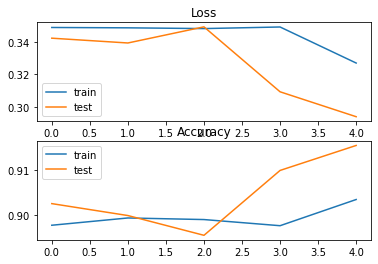

In [29]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [31]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)

C:\Users\Dr.PVVK\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
y_test,yhat_classes

(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64))

In [34]:
e = y_test-yhat_classes
str(e).count('0')

6